In [1]:
options(repr.plot.width=5, repr.plot.height=5)

# Introduction to Time Series Analysis

## Real Life Examples

The first step in any time series investigation always involves careful scrutiny of the recorded data plotted over time

### Johnson & Johnson

![Johnson & Johnson](./Images/johnson_johnson.png)

This picture shows quarterly earnings per share for the U.S. company Johnson&Johnson.

In this case we want to focus our attention on the __increasing underlying trend variability__, and somewhat __regular oscillation__ superimposed on the trend that seems to repeat over quarters.

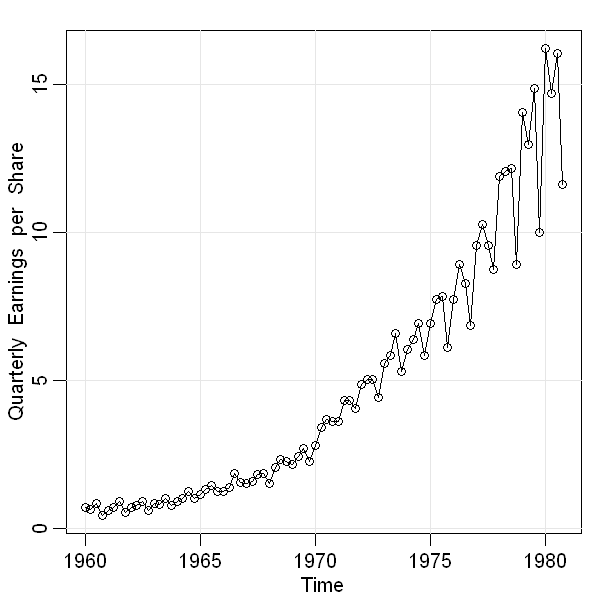

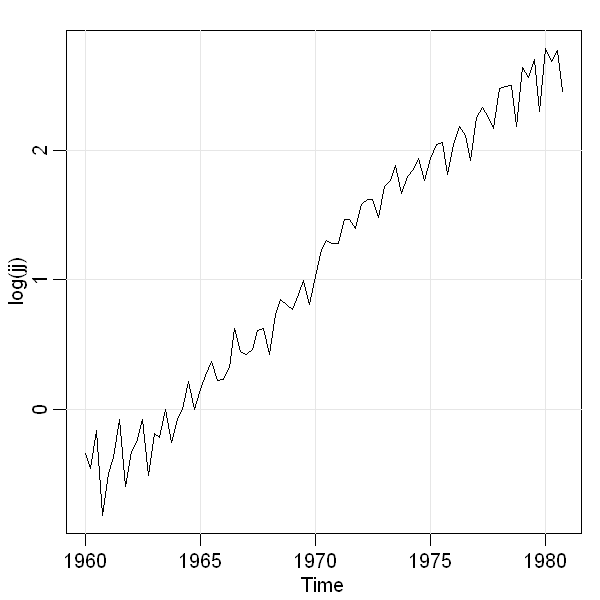

In [2]:
library(astsa)
tsplot(jj, type="o", ylab="Quarterly  Earnings  per  Share")
tsplot(log(jj)) # not  shown

### S&P100 Index

![S&P100 Index](./Images/S&P100.png)

This picture shows prices and daily returns of the Standard and Poor’s 100 Index (S&P100) from 1984 to 2017

It is easy to spot the financial crisis of 2008 in the figure

The mean of the series appears to be stable with an average return of apporximately zero, however, the __volatility__ (or __variability__) of data __exhibits clustering__; that is __highly volative periods tend to be clustered together__

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



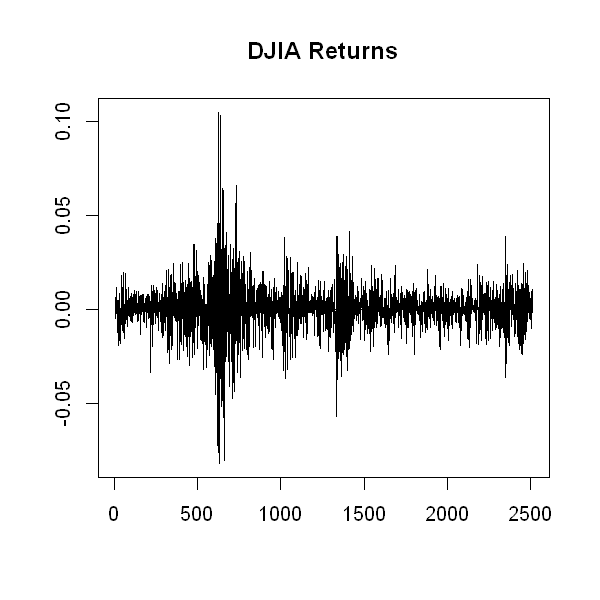

In [3]:
library(xts)
djiar = diff(log(djia$Close))[-1] # approximate returns
ts.plot(ts(djiar), main = "DJIA Returns", xlab='', margins=0)

### USD/GBP Foreign exchange rate

![USD/GBP Foreign exchange rate](./Images/USD_GBP.png)

This image shows the weekly USD/GBP foreign exchange rate (U.S. Dollars to One British Pound)

Loading required package: timeDate
Loading required package: timeSeries

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-



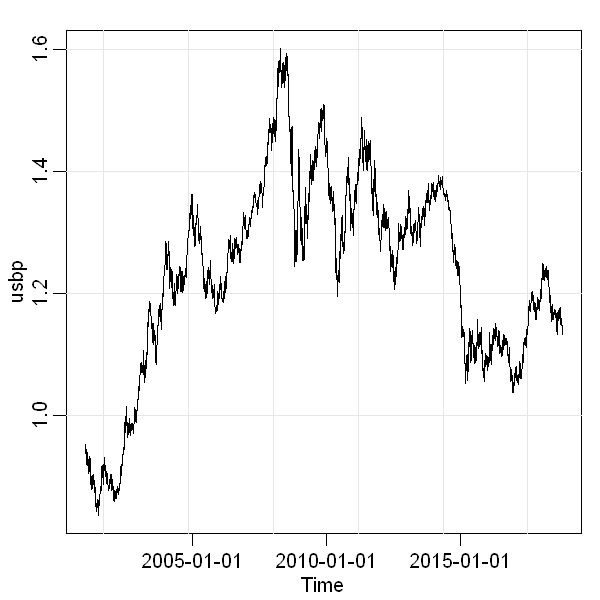

In [4]:
library("fImport")
usbp=fredSeries("DEXUSEU", from="2001-01-01")
tsplot(usbp)

### Crypto currencies

![Crypto currencies](./Images/crypto_currencies.png)

This image shows Cryptocurrency “BitCoin” from April 28, 2013 to November 25, 2017

## Time series methods

The primary objective of time series analysis is to develop mathematical models that provide plausible descriptions for sample data

### White noise

A simple kind of generated series might be a collection of uncorrelated random variables, _wt_, with __mean 0__ and __finite variance $\sigma^2$__. We denote this process as __$\epsilon_t \sim N(0,\sigma^2)$__

The time series generated from uncorrelated variables is used as a model for noise in engineering applications where it is called white noise

We often require stronger conditions and need the noise to be __Gaussian white noise__, where in the $\epsilon_t$ are independent and identically distributed (iid) normal random variables, with __mean 0__ and __variance $\sigma^2$__

Although both cases require __0 mean__ and __constant variance__, the difference is that generically, the term white noise means the time series is uncorrelated. __Gaussian white noise__ implies __normality__ (which implies __independence__)

If the stochastic behaviour of all time series could be explained in terms of the __white noise model__, classical statistical methods would suffice.

### Moving averages and filters

We might __replace__ the __white noise series wt__ __by__ a __moving average__ that __smooths the series__

e.g.

$$ v_t = \frac{1}{3}(\epsilon_{-1} + \epsilon_t + \epsilon_{t+1})$$

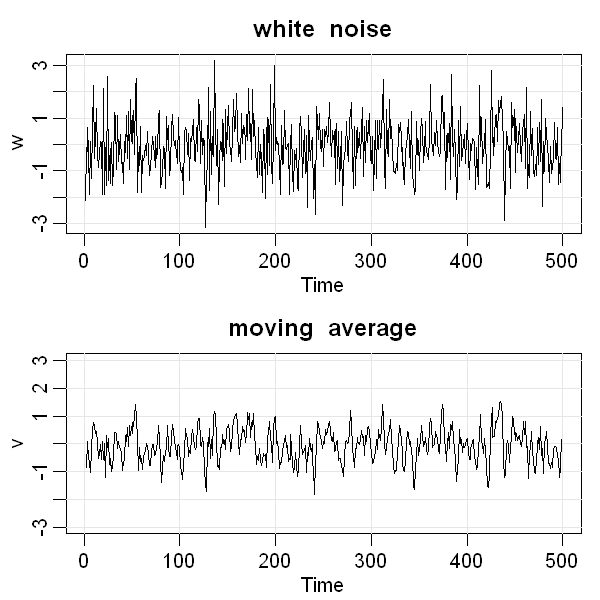

In [5]:
w = rnorm (500,0,1) # 500 N(0,1)  variates
v = filter(w, sides=2, rep (1/3 ,3)) # moving  average
par(mfrow=c(2,1))
tsplot(w, main="white  noise")
tsplot(v, ylim=c(-3,3), main="moving  average")

This series is much smoother than the white noise series, and it is apparent that averaging removes some of the high frequency behaviour of the noise.

A linear combination of values in a time series such as the above equation is referred to, generically, a filtered series; hence the command filter.

### Autoregressions

Suppose we consider the __white noise series $\epsilon_t$__ as input and calculate the output using the __second order equation__

$$ x_t = x_{t-1} -0.9x_{t-2}+\epsilon_t$$

Successively for t = 1,2... the previous equation represents a __regression or prediction__ fo the current value __$x_t$__ of a time series as a __function of the past two values__ of the series, and, hence, the term autoregression is suggested for this model.

A problem with startup values exists here because the equation also depends on the initial conditions $x_0$ and $x_{-1}$, but for now assume they are 0. We can then generate data recursively by substituting into the previuos formula

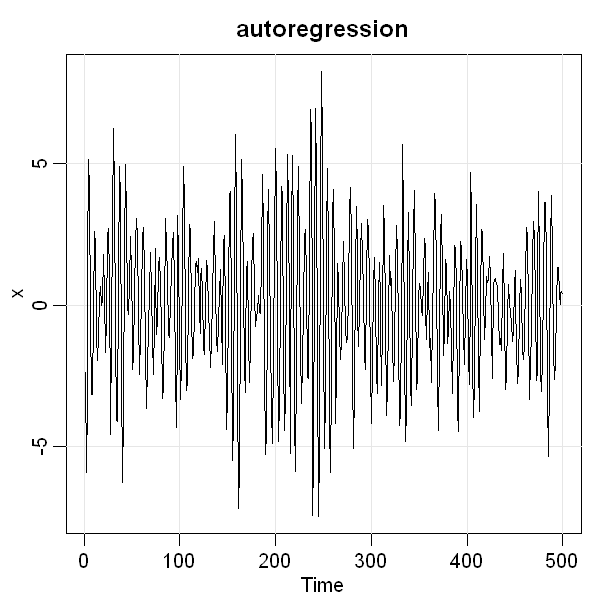

In [6]:
w = rnorm (550,0,1) # 50  extra  to  avoid  startup  problems
x = filter(w, filter=c(1,-.9), method="recursive")[-(1:50)]
tsplot(x, main="autoregression")

### Random walk with drift

$$ x_t = \delta + x_{x-1} + \epsilon_t$$

for t = 1,2,... with initial condition x_0 = 0, ans where ε_t is white noise. The constant δ is called the drift, and when δ = 0, the model is called simply a random walk because the value of the time t is the value of the series at time t-1 plus a completely random movement determined by ε_t. Note that we may rewrite the previous formula as a cumulative sum of white noise variates.

$$ x_t = \delta_t + \sum_{j = 1}^t \epsilon_j$$

for t = 1,2,...

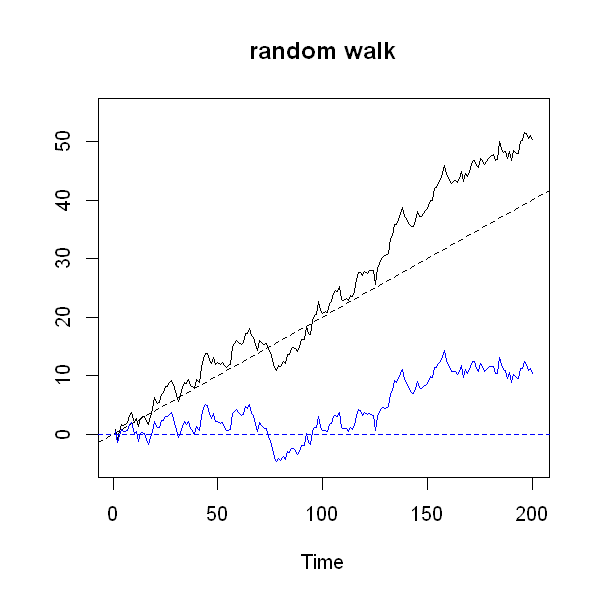

In [7]:
set.seed(154) # so you can reproduce the results
w = rnorm(200); x = cumsum(w) # two commands in one line
wd = w + .2; xd = cumsum(wd)
ts.plot(xd, ylim = c(-5, 55), main = "random walk", ylab ='')
abline(a = 0, b= .2, lty = 2) # drift
lines (x, col = 4)
abline (h = 0, col = 4, lty = 2)

### Measures of Dependence

We now discuss various measures that describe the general behavior of a process as it evolves over time. A rather simple descriptive measure is the mean function, such as the average monthly high temperature for your city. In this case, the mean is a function of time.

#### The mean function

$$ \mu_{x_t} = E(x_t) $$

#### The autocovariance function

$$\gamma_x(t,s) = cov(x_t,x_s) = E[(x_t - \mu_t)(x_s - \mu_s)]$$

The autocovariance measures the linear dependence between two points on the same series observed at different times.

Recall from classical statistics that if $\gamma_x(t,s) = 0$, then $x_s$ and $x_t$ are not linearly related, but there still may be some dependence structure between them.

If, however, $x_t$ and $x_s$ are bivariate normal, 
$\gamma_x(t,s) = 0$ ensures their independence. It is
clear that, for $s = t$, the autocovariance reduces to the (assumed finite) variance, because

$$\gamma_x(t,t) = cov(x_t,x_t) = E[(x_t-\mu_t)^2]=var(x_t)$$

#### The autocorrelation function

$$\rho_x(t,s) = \frac{\gamma_x(t,s)}{\sqrt{\gamma_x(t,t)}\sqrt{\gamma_x(s,s)}}$$

The ACF measures the linear predictability of the series at time $t$, say $x_t$, using only the value $x_s$.

We can show easily that $−1 \leq \rho_x(t,s)\leq 1$ using the Cauchy–Schwarz inequality.

If we can predict $x_t$ perfectly from $x_s$ through a linear relationship, $x_t = \beta_0 + \beta_1 x_s$, then
the correlation will be +1 when $\beta_1 > 0$, and −1 when $\beta_1 < 0$.

### Stationary time series

A strictly stationary time series is one for which the probabilistic behaviour of every collection of values and shifted values

$$\{x_{t_1},x_{t_2},...,x_{t_k}\}\,\ \{x_{t_1+h},x_{t_2+h},...,x_{t_k+h}\}$$

are identical, for all $k=1,2,...$ all the points $t_1,t_2,...,t_k$ and all time shifts $h=0,\pm 1,\pm 2,...$

It is difficult to assess strict stationarity from data, however, stationary time series data should exhibit similar behaviors over different time intervals.

A series that is obviously not stationary because of trend is global temperature.

A series that appears to be stationary is the moving average.

Rather than imposing conditions on all possible distributions of a time series, we will use a milder version that imposes conditions only on the first two moments of the series.

#### Definition
A weakly stationary time series is a finite variance process where

1. the mean value function, $\mu_t$ is constant and does not depend on time $t$, and
2. the autocovariance function, $\gamma(t,s)$ depends on $s$ and $t$ only through their distance $\mid t − s\mid$.

Henceforth, we will use the term stationary to mean weakly stationary; if a process is stationary in the strict sense, we will use the term strictly stationary.

Stationarity requires regularity in the mean and autocorrelation functions so that these quantities (at least) may be estimated by averaging. It should be clear that a strictly stationary, finite variance, time series is also stationary. The converse is not true in general.

One important case where stationarity implies strict stationarity is if the time series is Gaussian (meaning all finite collections of the series are Gaussian).

#### Definition

The autocovariance function of a stationary time series is defined as

$$ \gamma_x(t+h,t) = cov(x_{t+h},x_t) = E[(x_{x+h}-\mu)(x_t-\mu)]$$

and the autocorrelation function (ACF) will be written as

$$\rho_x(h) = \frac{\gamma_x(h)}{\gamma_x(0)}$$

#### Definition (Wold decomposition)

Any stationary time series, $x_t$, can be written as linear combination (filter) fo white noise terms; that is

$$ x_t = \mu \sum_{j=0}^\infty \psi_j\epsilon_{t-j} $$

where the $\psi$'s are numbers satisfying $\sum_{j=0}^\infty \psi_j^2 < \infty$ with $\psi_0 = 1$ and $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$.

We call these linear processes

### Exercises

#### Exercise 1

Let $v_t$ a moving average filter defined in equation
$$ v_t = \frac{1}{3}(\epsilon_{t-1}+\epsilon_t+\epsilon_{t+1})$$

then

1. calculate the mean function of $v_t$
2. calculate the autocovariance function of $v_t$
3. calculate the autocorrelation function of $v_t$

#### Exercise 2

Let $\epsilon_t \sim WN(0,\sigma^2_\epsilon)$ then

1. calculate the autocovariance function of $v_t$
2. calculate the autocorrelation function of $v_t$

#### Exercise 3

Let $x_t$ a random walk with drift process then

1. calculate the mean function of $x_t$
2. calculate the autocovariance function of $x_t$
3. calculate the autocorrelation function of $x_t$

#### Exercise 4

Let $x_t = \phi x_{t-1} +\epsilon_t$ where $\epsilon_t \sim WN(0,\sigma^2_\epsilon)$ and $ \mid\phi\mid <1$, then

1. calculate the mean function of $x_t$
2. calculate the variance function of $x_t$
3. calculate the autocovariance function of $x_t$
4. calculate the autocorrelation function of $x_t$

## ARIMA Models

### Introduction

Classical regression is often insufficient for explaining all of the interesting dynamics of a time series. Instead, the introduction of correlation through lagged linear relationships leads to proposing the autoregressive (AR) and moving average (MA) models.

Often, these models are combined to form the autoregressive moving average (ARMA) model.

Adding nonstationary models to the mix leads to the autoregressive integrated moving average (ARIMA) model popularized in the landmark work by Box and Jenkins (1970).

Seasonal data lead to seasonal autoregressive integrated moving average (SARIMA) models.

The Box–Jenkins method for identifying a plausible models is given in this chapter along
with techniques for parameter estimation and forecasting.

### Autoregressive processes

First, we investigate __autoregressive models__, which are an obvious extension of linear regression models.

#### Definition

An autoregressive model of order $p$, abbreviated $AR(p)$, is of the form

$$x_t = \phi_1x_{t-1} + \phi_2x_{t-2}+...+\phi_px_{t-p}+\epsilon_t\ \ \ (13)$$

where $x_t$ is stationary, and $\phi_1$,$\phi_2$,...,$\phi_p$ are constants $\phi_p\neq 0$. Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with mean zero and variance $\sigma_\epsilon^2$, abbreviated $\epsilon_t\sim WN(0,\sigma_\epsilon^2)$, unless otherwise stated. If the mean, $\mu$, of $x_t$ is non zero, replace $x_t$ by $x_t-\mu$ in the previous equation

$$x_t - \mu = \phi_1(x_{t-1}-\mu)+\phi_2(x_{t-2}-\mu)+...+\phi_p(x_{t-p} - \mu)+\epsilon_t$$

A useful form follows by using the backshift operator, $L^k x_t = x_{t-k}$ to write the $AR(p)$ model, in equation $(13)$, as

$$(1-\phi_1L-\phi_2L^2 +...+ \phi_pL^p)x_t = \epsilon_t$$

We note that equation $(13)$ is similar to the regression model, and hence the term auto (or self) regression. Some technical difficulties develop from applying that model because the regressors, $x_{t−1}$,...,$x_{t−p}$, are random components, whereas in regression, the regressors are assumed to be fixed.

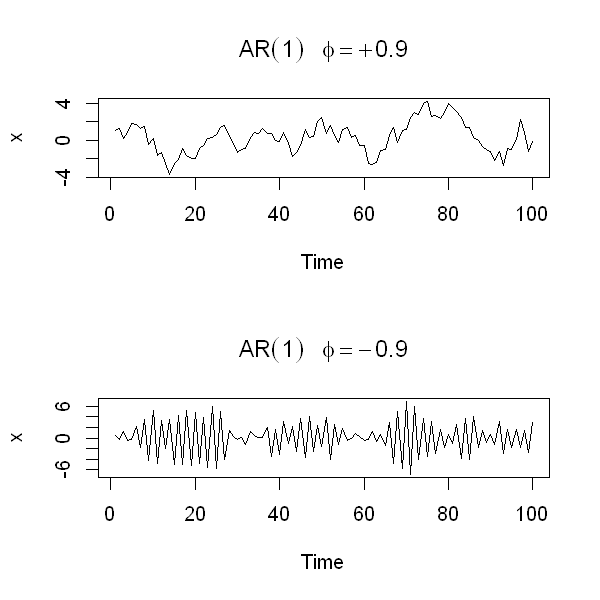

In [10]:
par(mfrow = c(2, 1))
ts.plot(arima.sim(list(order = c(1, 0, 0), ar = .9), n = 100), ylab = "x", main = (expression(AR(1)~~~phi == +.9)))
ts.plot(arima.sim(list(order=c(1, 0, 0), ar = -.9), n = 100), ylab = "x", main = (expression(AR(1)~~~phi == -.9)))

### Moving average processes

As an alternative to autoregression, think of wt as a "shock" to the process at time $t$. One can imagine that what happens today might be related to shocks from a few previous days. In this case, we have the moving average model of order $q$, abbreviated as $MA(q)$.

#### Definition

The moving average model of order $q$, or $MA(q)$ model, is defined to be

$$ x_t = \theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_p\epsilon_{t-p}+\epsilon_t$$

where there are $q$ lags in the moving average and $\theta_1$,$\theta_2$,...,$\theta_q$ with ($\theta_q\neq0$) are parameters. Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with
mean zero and variance $\sigma_\epsilon^2$, unless otherwise stated. As in the $AR(p)$ case, the $MA(q)$ model may be written as

$$x_t = (1+\theta_1L+\theta_2L^2+...+\theta_qL^q)\epsilon_t$$

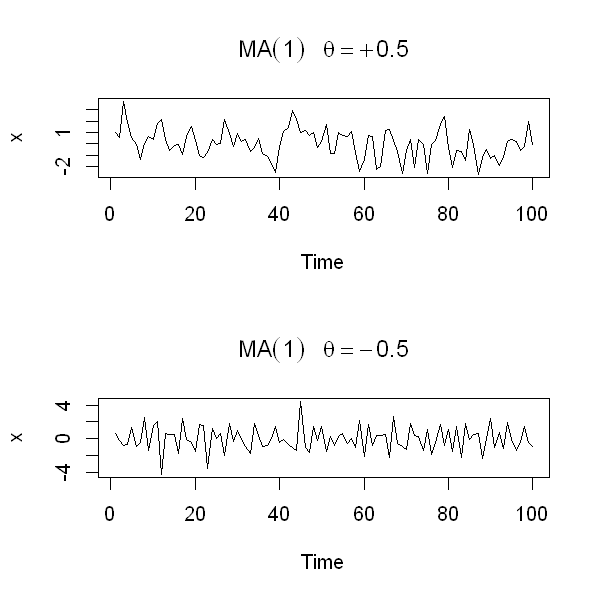

In [12]:
par(mfrow = c(2, 1))
ts.plot(arima.sim(list(order = c(0, 0, 1), ma = .9), n = 100), ylab = "x", main = (expression(MA(1)~~~theta == +.5)))
ts.plot(arima.sim(list(order = c(0, 0, 1), ma = -.9), n = 100), ylab = "x", main = (expression(MA(1)~~~theta == -.5)))

### ARMA processes

We now proceed with the general development of mixed autoregressive moving average __(ARMA)__ models for stationary time series.

#### Definition

A time series $x_t$, $t=0,\pm 1,\pm 2,...$ is __ARMA(p,q)__ if it is stationary and

$$ x_t = \phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}+\epsilon_t\ \ \ (17)$$

with $\phi_p\neq 0,\theta_q\neq 0$, and $\sigma_\epsilon^2 > 0$. The parameters $p$ and $q$ are called autoregressive and the moving average orders, respectively. If x_t has a nonzero mean $\mu$, we set $\alpha = \mu(1-\phi_1-...-\phi_p), and we write the model as

$$x_t = \alpha+\phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}+\epsilon_t$$

Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with mean zero and variance $\sigma_\epsilon^2$, unless otherwise stated.

The ARMA model may be seen as a regression of the present outcome ($x_t$) on the past outcomes ($x_{t−1}$,...,$x_{t−p}$), with correlated errors.

The __ARMA(p,q)__ model in equation $(17)$ may be written in concise form as

$$(L)_{x_t}=\theta(L)\epsilon_t$$

#### Definition (Causality)

Consider an __ARMA(p,q)__ process, $\phi(L)x_t = \theta(L)\epsilon_t$, where $\phi(L)$ and $\theta(L)$ do not have common factors. The casual form of the model is given by

$$ x_t = \phi(L)^{-1}\theta(L)\epsilon_t = \psi(L)\epsilon_t = \sum_{j=0}^\infty\psi_j\epsilon_{t-j}\ \ \ (21)$$

with $\sum_j=0^\infty \mid\psi_j\mid<\infty$, where $\psi(L) = \sum_j=0^\infty\psi_jL^j$ with $\psi_0 = 1$ and $\phi(L)^{-1}$ exists. When it does exists, then $\phi(L)^{-1}\phi(L)=1$. Also, since $x_t = \psi(L)\epsilon_t$, we must have $\phi(L)\psi(L)\epsilon_t=\theta(L)\epsilon_t$ so the parameters $\psi_j$ may be obtained by matching coefficients of $L$ in $\phi(L)\psi(L)=\theta(L)$

#### Definition (Invertibility)
Consider an __ARMA(p,q)__ process, $\phi(L)x_t=\theta(L)\varepsilon_t$, where $\phi(L)$ and $\theta(L)$ do not have common factors. The invertible form of the model is given by

$$\epsilon_t =\theta(L)^{-1}\phi(L)x_t =\pi(L)x_t=\sum_{j=0}^\infty\pi_j x_{t-j}\ \ \ (22)$$

where $\pi(L)=\sum_{j=0}^\infty\pi_jL^j$ with $\pi_0=1$ and $\theta(L)^{-1}$ exists. When it does exists, then $\theta(L)^{-1}\theta(L)=1$. The parameters $\pi_j$ may be obtained by matching coefficients of $L$ in 
$\pi(L)\theta(L)=\psi(L)$


##### Remark
Causality requires that the present value of the time series, $x_t$, does not depend on the future (otherwise, forecasting would be futile). Invertibility requires that the present shock, $\epsilon_t$, does not depend on the future.

#### Definition (Causality and invertibility, existence)

Let

$$\phi(z) = 1-\phi_1z-...-\phi_pz^p$$
$$\theta(z) = 1+\theta_1z+...+\theta_qz^q$$

be the __AR__ and __MA__ polynomials obtained by replacing the backshift operator $L$ by a complex number $z$

An __ARMA(p,q)__ model $\phi(L)x_t = \theta(L)\epsilon_t$ is casual if and only if $\phi(z)\neq 0$ for all $\mid z\mid\leq 1$. The coefficients of the linear process given in equation $(21)$ can be determined by solving

$$\psi(z) = \sum_{j=0}^\infty\psi_jz^j=\frac{\theta(z)}{\phi(z)},\ \ \ \mid z\mid\leq 1$$

with $\psi_0 = 1$

An __ARMA(p,q)__ model is invertible if and only if $\theta(z)\neq 0$ for $\mid z\mid\leq 1$. The coefficient $\pi_j$ of $\pi(L)$ fo the linear process given in equation $(22)$ can be determined by solving

$$ \pi(z)=\sum_{j=0}^\infty\pi_jz^j=\frac{\phi(z)}{\theta(z)},\ \ \ \mid z\mid\leq 1$$

with $\psi_0=1$

##### Remark (Stationarity and causality)

An $AR(p)$ process $\phi(L)x_t = \epsilon_t$ is said to be causal if and only if all the roots of the characteristic equation $\phi(z) = 0$ lie outside the unit circle, i.e., $\mid z\mid > 1$ which implies that $\sum_{j=0}^\infty\mid\psi_j\mid<\infty$. Moreover $\sum_{j=0}^\infty\mid\psi_j\mid^2<\sum_{j=0}^\infty\mid\psi_j\mid<\infty$, therefore any casual $AR(p)$ process is stationary.

##### Example

SLIDE 67/68

##### Exercise

Let us consider the $MA(1)$ process $x_t = \theta\epsilon_{t−1} + \epsilon_t$, with $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$. Verify that the process is causal (stationary) for all $\theta\in R$. Is the process $x_t$ invertible? Find the weights $\psi_j$ of the Wold representation, $\psi_j$ , for j = 0, 1, 2, ... .

The following code provides the first 50 $\psi$–weights of an __ARMA(1,1)__ process with given parameters in R:

[1] 1.400000000 1.260000000 1.134000000 1.020600000 0.918540000 0.826686000
 [7] 0.744017400 0.669615660 0.602654094 0.542388685 0.488149816 0.439334835
[13] 0.395401351 0.355861216 0.320275094 0.288247585 0.259422826 0.233480544
[19] 0.210132489 0.189119240 0.170207316 0.153186585 0.137867926 0.124081134
[25] 0.111673020 0.100505718 0.090455146 0.081409632 0.073268669 0.065941802
[31] 0.059347622 0.053412859 0.048071573 0.043264416 0.038937975 0.035044177
[37] 0.031539759 0.028385783 0.025547205 0.022992485 0.020693236 0.018623913
[43] 0.016761521 0.015085369 0.013576832 0.012219149 0.010997234 0.009897511
[49] 0.008907760 0.008016984

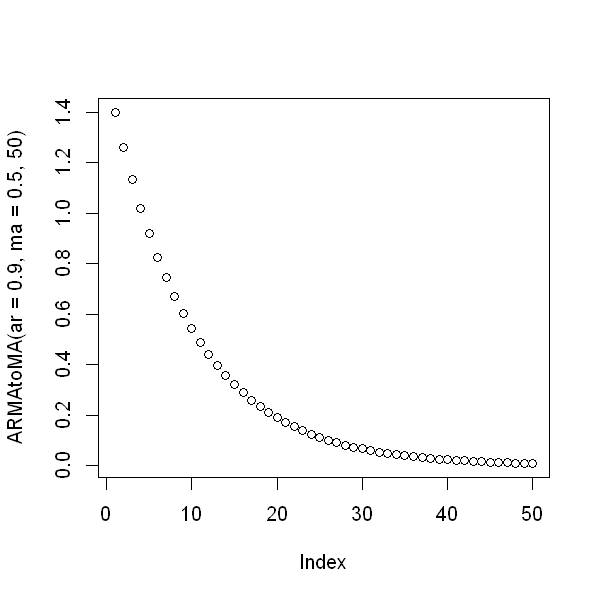

In [13]:
ARMAtoMA (ar=0.9 , ma=0.5 , 50) # for a list
plot ( ARMAtoMA (ar=0.9 , ma=0.5 , 50) ) # for a graph

##### Remark

page 70